# Handling Outliers by Replacing them with Mean / Median / Mode 

In [10]:
#1 Replacing the outliers with Mean
# Mean value is used as a replacemnet for the folowing conditions in a dataset
### Suitable for normally distributed data without significant skewness
### The mean reflects the central tendency of symmetric data but is sensitive to extreme values.

import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Parameters for the normal distribution
mean = 50         # Mean of the distribution
std_dev = 10       # Standard deviation
sample_size = 1000 # Number of data points


In [36]:
# Generate a symmetrically distributed dataset
symmetric_data = np.random.normal(loc=mean, scale=std_dev, size=sample_size)
# symmetric_data

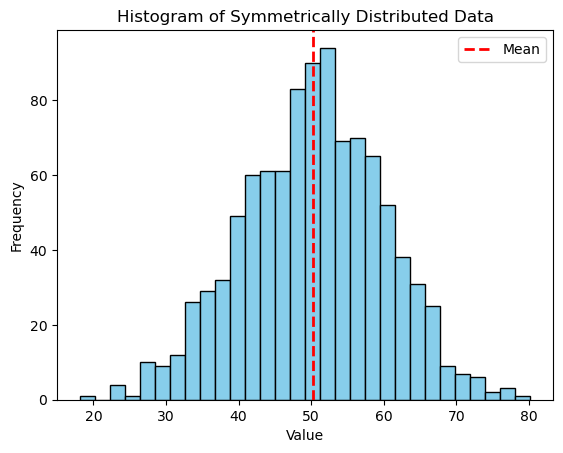

In [12]:


# Plotting the histogram to visualize the distribution
plt.hist(symmetric_data, bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Symmetrically Distributed Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.axvline(np.mean(symmetric_data), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.legend()
plt.show()

In [18]:
# Introduce outliers
outliers = [1,3,5,150, 160, 170]  # Extreme high values
symmetric_data_with_outliers = np.append(symmetric_data, outliers)

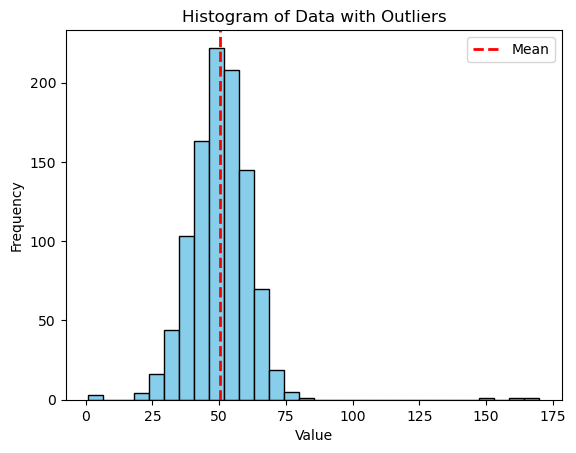

In [20]:
# Plotting the histogram to visualize the data with outliers
plt.hist(symmetric_data_with_outliers, bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Data with Outliers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.axvline(np.mean(symmetric_data_with_outliers), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.legend()
plt.show()

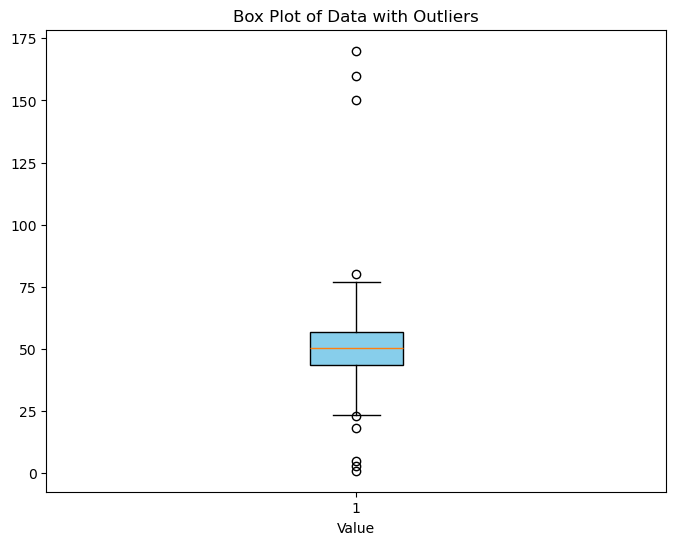

In [28]:
# Plotting the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(symmetric_data_with_outliers, vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title("Box Plot of Data with Outliers")
plt.xlabel("Value")
plt.show()

In [30]:
# Procedure to Replace the Outliers with mean value
# Calculate Q1, Q2 (median), Q3
Q1 = np.percentile(symmetric_data_with_outliers, 25)  
Q2 = np.percentile(symmetric_data_with_outliers, 50)  
Q3 = np.percentile(symmetric_data_with_outliers, 75)  

# Calculate IQR
IQR = Q3 - Q1  # Interquartile range


In [32]:
# Calculate lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

In [46]:
count = 0  # Initialize a counter to count the number of outliers


for x in symmetric_data_with_outliers:
    
    if x <= lower_fence:
        print("Lower", x)  
        count += 1  

    
    elif x >= upper_fence:
        print("Higher", x)  
        count += 1  

    
    else:
        pass  


print(count, "Outliers")  


Lower 22.95678211528824
Lower 18.09642788807244
Higher 80.20982296053874
Lower 1.0
Lower 3.0
Lower 5.0
Higher 150.0
Higher 160.0
Higher 170.0
9 Outliers


In [50]:
# Calculate the mean of the symmetric data with outliers
mean_with_outliers = np.mean(symmetric_data_with_outliers)
mean_with_outliers

50.41265304508693

In [52]:
# Replace outliers with the mean value
replaced_data = []

for x in symmetric_data_with_outliers:
    if x <= lower_fence or x >= upper_fence:
        replaced_data.append(mean_with_outliers)  # Replace outlier with mean
    else:
        replaced_data.append(x)  # Keep non-outliers unchanged

# Convert the list back to a NumPy array
replaced_data = np.array(replaced_data)

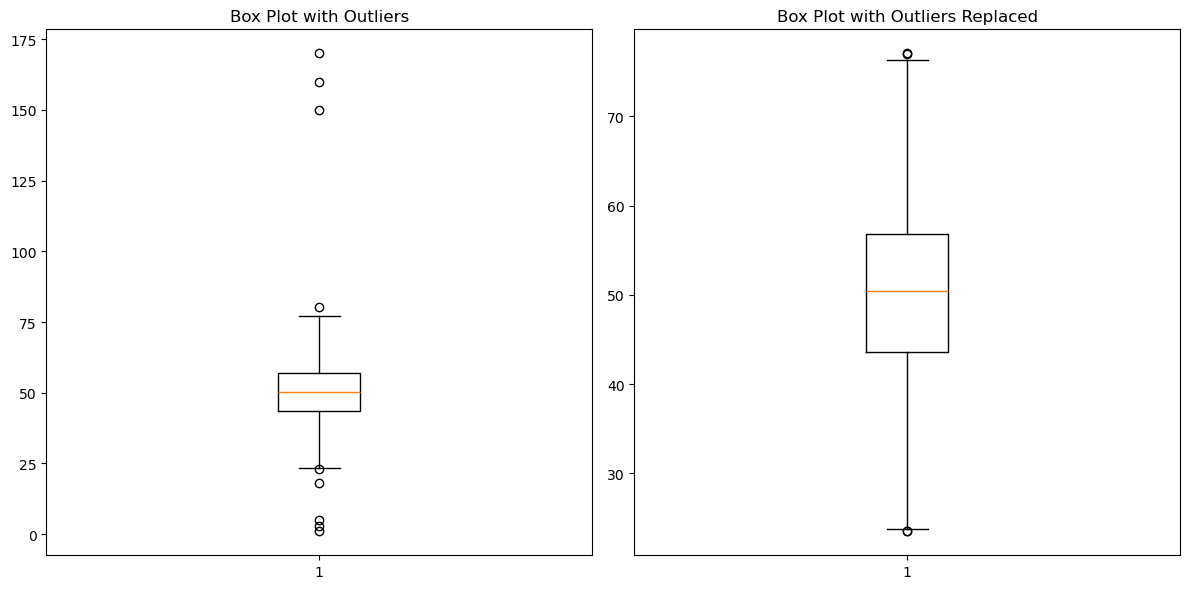

In [54]:
# Plotting the comparison between the original data and data with replaced outliers
plt.figure(figsize=(12, 6))

# Box plot for symmetric data with outliers
plt.subplot(1, 2, 1)
plt.boxplot(symmetric_data_with_outliers)
plt.title("Box Plot with Outliers")

# Box plot for data with outliers replaced by mean
plt.subplot(1, 2, 2)
plt.boxplot(replaced_data)
plt.title("Box Plot with Outliers Replaced")

# Show the plots
plt.tight_layout()
plt.show()

In [60]:
# Count outliers in the replaced data 
count_replaced = 0  



for x in replaced_data:
    
    if x <= lower_fence:
        print("Lower (Replaced)", x)  
        count_replaced += 1  

    
        print("Higher (Replaced)", x)  
        count_replaced += 1  

    else:
        pass  


print(count_replaced, "Outliers in replaced data")

0 Outliers in replaced data


##### Summary of Practice Session: Replacing Outliers with Mean
In this session, we explored the process of identifying and replacing outliers in a dataset. 

We began with a symmetrically distributed dataset that was generated using a normal distribution. 

Outliers were then artificially introduced into the data to simulate extreme values that could affect the dataset's central tendency.


##### Identifying Outliers:

We defined outliers as data points that fall outside the "fences" created by the lower fence and upper fence. These fences were calculated based on the Interquartile Range (IQR), which is the difference between the first (Q1) and third (Q3) quartiles.
The lower fence was defined as Q1 - 1.5 * IQR, and the upper fence as Q3 + 1.5 * IQR. Any data point outside this range was considered an outlier.

##### Replacing Outliers:
We calculated the mean of the dataset (including the outliers) and used this value to replace any outliers found in the dataset. If a data point was determined to be an outlier (below the lower fence or above the upper fence), it was replaced with the mean of the data.

##### Comparison of the Original and Modified Data:
To compare the effect of replacing outliers, we plotted box plots of both the original dataset (with outliers) and the modified dataset (with outliers replaced by the mean). The original box plot showed extreme values beyond the whiskers, indicating the presence of outliers, while the modified box plot displayed a more compact distribution with fewer outliers.

##### Counting Outliers:
We also implemented a process to count the outliers in both the original and the modified datasets. The original dataset showed a higher count of outliers, while the modified dataset, after replacing the outliers with the mean, had no outliers.